In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
item_categories=pd.read_csv('item_categories.csv')
items=pd.read_csv('items.csv')
sales_train=pd.read_csv('sales_train.csv')
data = pd.read_csv('sales_train.csv')
shops=pd.read_csv('shops.csv')
test=pd.read_csv('test.csv')

In [3]:
data.dtypes

date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [5]:
data.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [6]:
data['item_price'].describe()

count    2.935849e+06
mean     8.908532e+02
std      1.729800e+03
min     -1.000000e+00
25%      2.490000e+02
50%      3.990000e+02
75%      9.990000e+02
max      3.079800e+05
Name: item_price, dtype: float64

In [7]:
data['shop_id'].unique().shape

(60,)

In [8]:
data['item_id'].unique().shape

(21807,)

there are total 60 shops and total 21807 unique items. And the date ranges from 

entries number and date_block_number

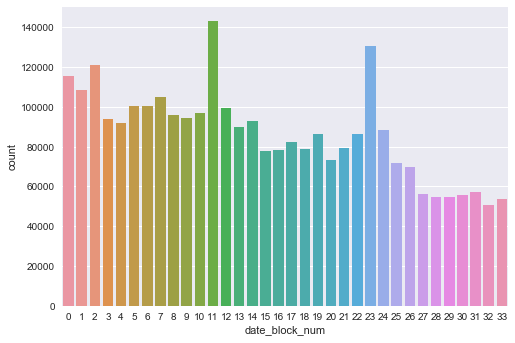

In [9]:
sns.countplot(x='date_block_num', data=sales_train)
plt.show()

we can clearly see that there are more records for Decembers of every year. I think it is because People tend to buy more items during the Chrismas. Actually it is a seasonality. We can also find a trend that the entries are becoming fewer from 2013 to 2014.

item entries of different shop

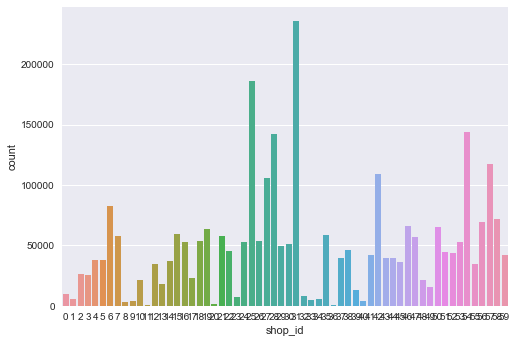

In [10]:
sns.countplot(x='shop_id', data=sales_train)
plt.show()

the shop 31 and 25 has the most bumber of entires, they may make a great contribution to the total sales trends.Therefore we need discover further for this two shops.

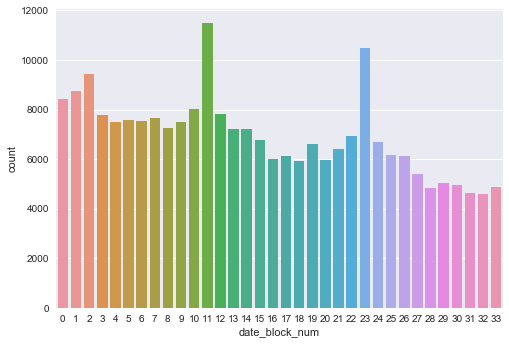

In [11]:
shop31=sales_train[sales_train['shop_id']==31]
sns.countplot(x='date_block_num', data=shop31)
plt.show()

In [12]:
sales_month = sales_train.groupby(['date_block_num'])['item_cnt_day'].sum()
sales_month=pd.DataFrame(sales_month)
sales_month["date_block_num"]=sales_month.index

total item sold of every month

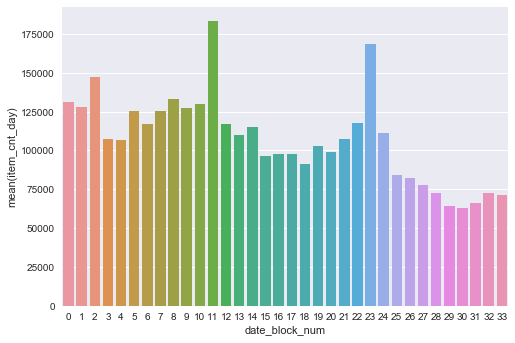

In [13]:
sns.barplot(x="date_block_num", y="item_cnt_day", data=sales_month , order=sales_month['date_block_num'])
plt.show()

In [14]:
dt = sales_train.iloc[:,:].values
dt[:,4:5]
revenue=np.multiply(dt[:,4:5],dt[:,5:])
re = pd.DataFrame(revenue)
re.columns = ['revenue']
new_salse=pd.concat([sales_train,re],axis=1)

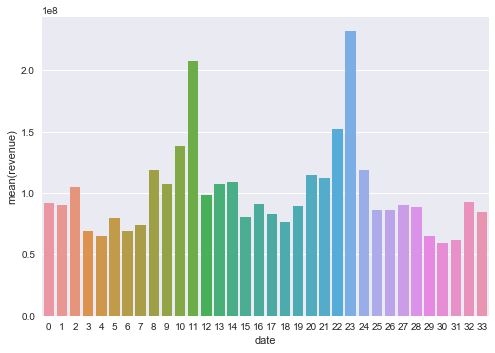

In [15]:
sales_price = new_salse.groupby(['date_block_num'])['revenue'].sum()
sales_price=pd.DataFrame(sales_price)
sales_price['date']=sales_price.index.values
sns.barplot(x="date", y="revenue", data=sales_price , order=sales_price['date'])
plt.show()

In the graph, the December of the 2013 and 2014 are also the most top month, but interesting thing is that even the item sold of 2013 is more than the 2014, the total revenue of 2014 is much than 2013.Inaddtion there isn't a decreasing trend for total revenue from 2013 to 2014. That is said, even the number of item sold decrease, the price of each item increase.

12/2013 sales suitation 

In [16]:
price_2013=new_salse[new_salse['date_block_num']==11]
sales_day =price_2013.groupby(['date']).sum()
sales_day.index.values
sales_day['dd']=sales_day.index.values

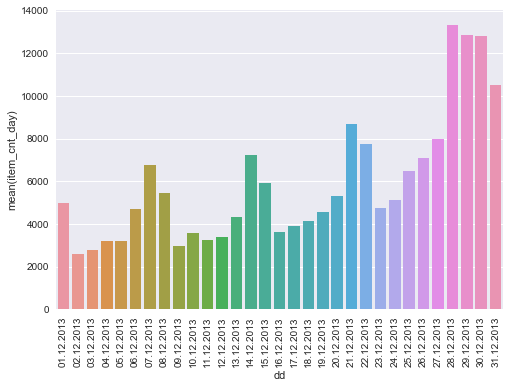

In [17]:
sns.barplot(x="dd", y="item_cnt_day", data=sales_day , order=sales_day['dd'] )
plt.xticks(rotation=90)
plt.show()

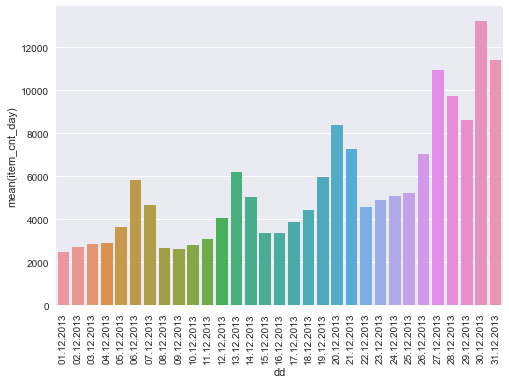

In [18]:
price_2014=new_salse[new_salse['date_block_num']==23]
sales_day14 =price_2014.groupby(['date']).sum()
sales_day14
sales_day14.index.values
sales_day14['dd']=sales_day.index.values
sns.barplot(x="dd", y="item_cnt_day", data=sales_day14 , order=sales_day14['dd'] )
plt.xticks(rotation=90)
plt.show()

It can justify our arguments that people tend to buy more items for the chrismas day.To specific, after the chrismas people tend to buy more things for the New Year's day.The biggest day is six time than the worst day of these month.

In [19]:
sales_date=new_salse.groupby(['date']).sum()
sales_date['item_cnt_day'].describe()

count     1034.000000
mean      3528.245648
std       1584.687467
min       1274.000000
25%       2472.250000
50%       3145.000000
75%       4257.000000
max      13343.000000
Name: item_cnt_day, dtype: float64

the mean of the total items sold for every month ranges from 1274 to 13343 and the average number of sold items is 3528.Even the range is so big, we don't need to scale it since we need to predict the true number of the items.

In [20]:
item_categories

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
6,Аксессуары - XBOX 360,6
7,Аксессуары - XBOX ONE,7
8,Билеты (Цифра),8
9,Доставка товара,9


In [21]:
#for this part you must to connect with Internet
from googletrans import Translator
index =0
translator = Translator()
for row in item_categories["item_category_name"]:
    english_word = translator.translate(row)
    item_categories.iloc[index,0] = english_word.text
    index=index+1
  

ConnectionError: HTTPSConnectionPool(host='translate.google.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<requests.packages.urllib3.connection.VerifiedHTTPSConnection object at 0x119124e48>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known',))

In [22]:
item_categories

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
6,Аксессуары - XBOX 360,6
7,Аксессуары - XBOX ONE,7
8,Билеты (Цифра),8
9,Доставка товара,9


we can see that many categories are written by Russian Therefore we need to transfer it into English.
After translation, we find that many catergories belong to the same main categories. For example， the Accessories - PS2,Accessories-PS3, Accessories - PS4 are all belongs to the same category--Accessories. So we can aggregate them into the same category.

In [23]:
category=items.groupby(['item_category_id']).count()
category['category_name']=item_categories["item_category_name"]

In [24]:
categorysales=pd.merge(new_salse, items, on='item_id')

In [25]:
categorysales=pd.merge(categorysales, item_categories, on='item_category_id')

In [26]:
categorysales['revenue']=categorysales[['revenue']].astype(float)
categorysales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
date                  object
date_block_num        int64
shop_id               int64
item_id               int64
item_price            float64
item_cnt_day          float64
revenue               float64
item_name             object
item_category_id      int64
item_category_name    object
dtypes: float64(3), int64(4), object(3)
memory usage: 246.4+ MB


In [27]:
categorysum=categorysales.groupby(['item_category_name']).sum()

top 20 categories of sold item

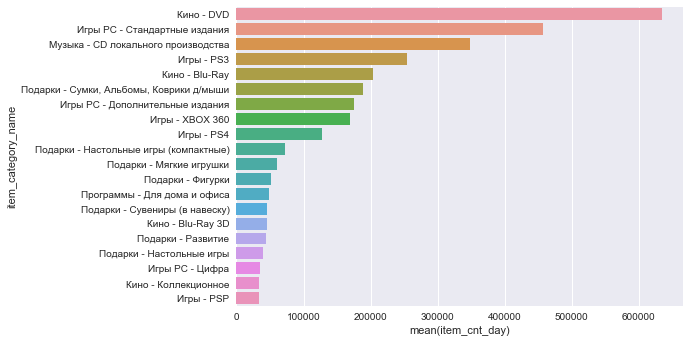

In [28]:
categorysum.index.values
categorysum['item_category_name']=categorysum.index.values
categorysum_top20=categorysum.sort_values(by=['item_cnt_day'],ascending=False).head(20)
sns.barplot(y="item_category_name", x="item_cnt_day", data=categorysum_top20)
plt.show()

We can find that the best selling for all categories is Cinema-DVD, but we can see in the top20 best seelling categories, most of them are about Games and Gifts. We can assume that people tend to buy the Gifts and Games and send to others as the chrismas or New year's day gift accroding to the trend we observed before about the items sold trend.In addition, we can discover more about the relationship between categories and revenue.

top 20 most revenue 

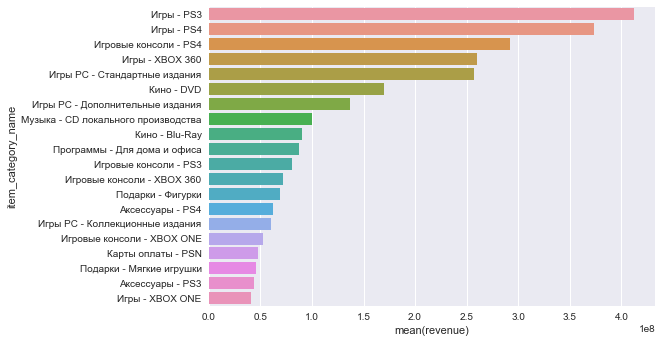

In [29]:
categoryprice_top20=categorysum.sort_values(by=['revenue'],ascending=False).head(20)
sns.barplot(y="item_category_name", x="revenue", data=categoryprice_top20)
plt.show()

We can see that also all most profitable items are related to the Games. It can justify our arguments about the people tend to buy Games. But we need to discover further about the relation ship with month.

In [30]:
categorymonth11=categorysales[categorysales['date_block_num']==11].groupby(['item_category_name']).sum()

category suitation of 12/2013

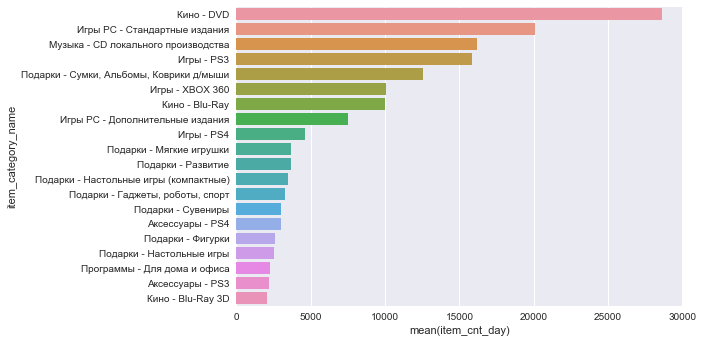

In [31]:
categorymonth11.index.values
categorymonth11['item_category_name']=categorymonth11.index.values
category11_top20=categorymonth11.sort_values(by=['item_cnt_day'],ascending=False).head(20)
sns.barplot(y="item_category_name", x="item_cnt_day", data=category11_top20)
plt.show()

But the truth is that people tend to buy more Cinema-DVD on the December of 2013...

we allocate the categories into main categories of them


allocate my own main category

In [32]:
categorysales['main_category']=categorysales.item_category_name.str.extract('([A-Za-z\ ]+)', expand=False) 

In [33]:
categorysales['main_category'].unique()

array([' ', ' PC ', nan, 'PC ', ' Android ', ' MAC '], dtype=object)

In [34]:
categorymonth_main=categorysales.groupby(['main_category']).sum()
categorymonth_main['main_category']=categorymonth_main.index.values
category_main_top20=categorymonth_main.sort_values(by=['item_cnt_day'],ascending=False).head(20)

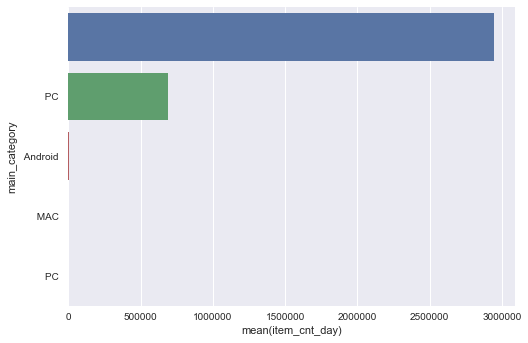

In [35]:
sns.barplot(y="main_category", x="item_cnt_day", data=category_main_top20)
plt.show()

12/2013 main category suitation

In [36]:
categorymonth_11_main=categorysales[categorysales['date_block_num']==11].groupby(['main_category']).sum()

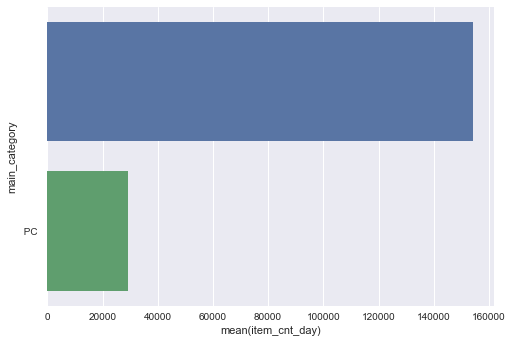

In [37]:
categorymonth_11_main.index.values
categorymonth_11_main['main_category']=categorymonth_11_main.index.values
category_11_main_top20=categorymonth_11_main.sort_values(by=['item_cnt_day'],ascending=False).head(20)
category_11_main_top20
sns.barplot(y="main_category", x="item_cnt_day", data=category_11_main_top20)
plt.show()

total sold item revenue  suitation of main category

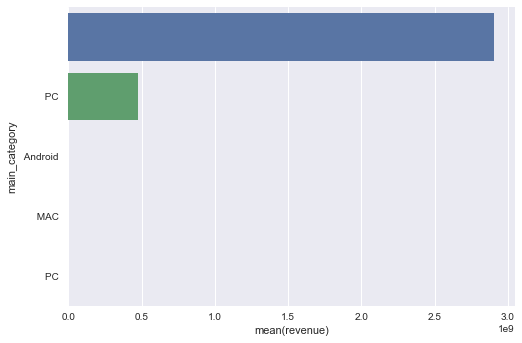

In [38]:
category_main_price_top20=categorymonth_main.sort_values(by=['revenue'],ascending=False).head(20)
category_main_price_top20
sns.barplot(y="main_category", x='revenue', data=category_main_price_top20)
plt.show()

12/2013 revenue main category

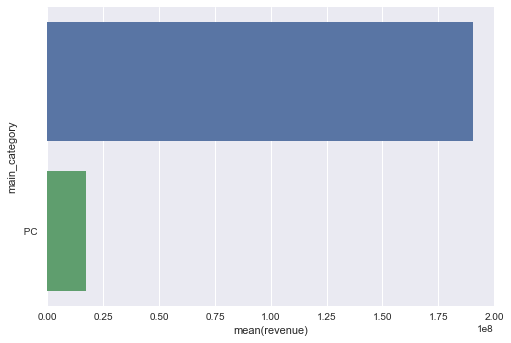

In [39]:
category_11_price_top20=categorymonth_11_main.sort_values(by=['revenue'],ascending=False).head(20)
category_11_price_top20
sns.barplot(y="main_category", x='revenue', data=category_11_price_top20)
plt.show()

But the Games and Game Consoles makes more contribution to the total Avune for December. It can make sense that Game Console are more expensive than the CDs or other things.

In [40]:
categorymonth_23_main=categorysales[categorysales['date_block_num']==23].groupby(['main_category']).sum()
categorymonth_23_main.index.values
categorymonth_23_main['main_category']=categorymonth_11_main.index.values
category_23_main_top20=categorymonth_23_main.sort_values(by=['item_cnt_day'],ascending=False).head(20)
category_23_main_top20
sns.barplot(y="main_category", x="item_cnt_day", data=category_23_main_top20)
plt.show()

ValueError: Length of values does not match length of index

In [ ]:
category_23_price_top20=categorymonth_23_main.sort_values(by=['revenue'],ascending=False).head(20)
category_23_price_top20
sns.barplot(y="main_category", x='revenue', data=category_23_price_top20)
plt.show()